# Handwriting Recognition using K-Means
### Machine Learning Unsupervised Project

Machine learning and scanning technologies has been widely used in the public since 1999. For instance:
- Post office can recognize handwritten addresses
- ATMs can regocnize handwritten bank checks
- Evernote can recognize handwritten task lists.

This project will use digits dataset from `sklearn` library along with K-means clustering and scikit-learn to cluster images of handwritten digits.

### Import Python Modules

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(digits.target)

[0 1 2 ... 8 9 8]


### Visualize the Sample Images

<Figure size 432x288 with 0 Axes>

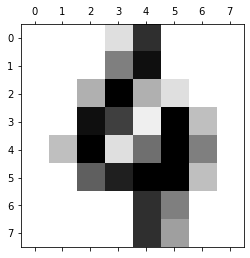

4


In [5]:
# visualize the image at index 100
plt.gray()
plt.matshow(digits.images[100], cmap=plt.cm.binary)
plt.show()

print(digits.target[100])

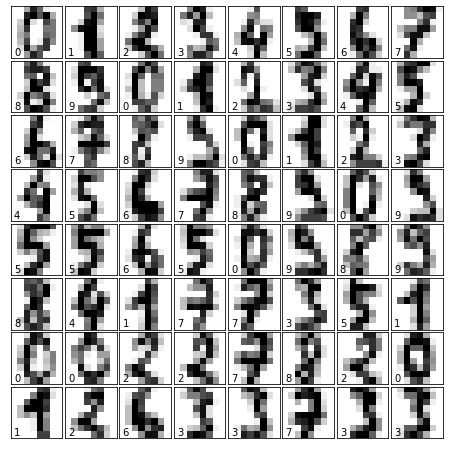

In [6]:
# visualize multiple images - 64 sample images

# Figure size (width, height)
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

### Build a KMeans Model
There are 1797 different digit images in this dataset. Cluster the images into groups. Since there is 10 digits, it is reasonable to use 10 clusters to build the model.

In [7]:
model = KMeans(n_clusters = 10, random_state = 42)

In [8]:
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

Visiualize the Centroids. The cluster centers seem to represent as followings:
- Index `0` looks like 7
- Index `1` looks like 5
- Index `2` looks like 6
- Index `3` looks like 2
- Index `4` looks like 4
- Index `5` looks like 0
- Index `6` looks like 3
- Index `7` looks like 1
- Index `8` looks like 8
- Index `9` looks like 9

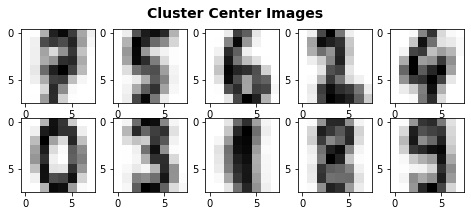

In [9]:
fig = plt.figure(figsize=(8, 3))
plt.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
plt.show()

### Test the Model
Feed new arrays into the model and see how to model perform

In [10]:
# # Array of handwritten digits 2020 
# new_samples = np.array([
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.95,5.95,6.86,6.86,4.48,0.00,0.00,2.98,7.62,6.38,4.12,5.19,7.62,0.76,0.00,2.59,5.19,0.08,0.23,5.64,7.40,0.53,0.00,0.00,0.00,0.92,5.64,7.62,3.05,0.00,0.00,0.08,3.49,7.40,7.40,2.82,0.00,0.00,0.00,4.99,7.62,7.62,7.02,6.10,6.10,6.02,0.00,3.26,4.57,4.57,4.57,4.57,4.57,4.50],
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.98,2.52,1.91,0.15,0.00,0.00,0.00,1.45,7.47,7.62,7.62,6.61,1.14,0.00,0.00,4.57,7.40,1.22,2.80,7.32,5.26,0.00,0.00,6.10,5.34,0.00,0.00,4.73,6.10,0.00,0.00,6.10,5.11,0.00,0.23,6.56,5.72,0.00,0.00,4.81,7.62,6.61,6.61,7.62,2.52,0.00,0.00,0.23,3.28,5.03,5.18,2.80,0.00,0.00],
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,1.91,2.21,0.28,0.00,0.00,0.00,1.50,6.69,7.62,7.62,4.80,0.00,0.00,0.00,4.35,7.24,2.67,4.88,6.86,0.00,0.00,0.00,0.38,1.00,0.46,6.25,6.64,0.00,0.00,0.00,0.00,2.29,6.63,7.62,3.58,1.52,0.28,0.00,4.51,7.63,7.62,7.62,7.62,7.62,2.90,0.00,3.87,4.65,3.21,2.13,1.52,1.52,0.28],
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,2.44,3.05,2.44,0.30,0.00,0.00,0.00,4.73,7.62,7.62,7.62,7.07,1.53,0.00,1.67,7.55,4.40,0.23,2.19,7.01,4.50,0.00,4.34,7.40,0.46,0.00,0.00,6.10,4.57,0.00,4.57,6.18,0.00,0.00,0.84,7.55,4.12,0.00,3.89,7.62,4.53,2.82,6.48,7.24,1.14,0.00,0.23,4.98,7.55,7.62,7.14,1.83,0.00]
# ])


# # Array of handwritten digits 1928
# new_samples = np.array([
# [0.00,0.00,0.00,3.81,5.87,0.00,0.00,0.00,0.00,0.00,1.07,7.47,7.62,1.60,0.00,0.00,0.00,0.00,3.05,7.62,7.62,3.35,0.00,0.00,0.00,0.00,0.76,2.60,7.09,3.81,0.00,0.00,0.00,0.00,0.00,0.00,6.86,3.81,0.00,0.00,0.00,0.00,0.00,0.00,6.86,3.96,0.00,0.00,0.00,0.00,0.00,0.00,6.48,4.57,0.00,0.00,0.00,0.00,0.00,0.00,5.65,4.12,0.00,0.00],
# [0.00,0.28,3.89,4.35,2.72,0.15,0.00,0.00,0.00,5.26,7.62,7.17,7.62,5.06,0.00,0.00,0.61,7.63,3.89,0.15,4.86,7.62,1.45,0.00,0.69,7.63,5.72,4.57,7.39,7.62,0.76,0.00,0.00,3.79,6.56,6.86,6.38,7.62,0.76,0.00,0.00,0.00,0.00,0.00,2.29,7.62,0.76,0.00,0.00,0.00,0.00,0.00,2.29,7.62,1.15,0.00,0.00,0.00,0.00,0.00,0.97,5.19,0.69,0.00],
# [0.00,0.00,0.00,0.38,0.76,0.38,0.00,0.00,0.00,0.51,5.14,7.55,7.62,7.20,0.92,0.00,0.00,4.12,7.55,4.40,4.02,7.62,2.29,0.00,0.00,3.20,4.50,1.75,6.86,6.86,0.92,0.00,0.00,0.00,3.05,7.40,6.86,1.15,0.00,0.00,0.00,3.43,7.62,6.41,2.74,3.05,2.87,0.08,0.69,7.63,7.62,7.62,7.62,7.62,7.45,0.54,0.08,2.87,3.05,2.59,1.75,0.30,0.00,0.00],
# [0.00,2.40,3.81,3.51,0.84,0.00,0.00,0.00,0.00,6.79,7.47,7.62,6.92,0.46,0.00,0.00,0.00,6.08,7.07,3.74,7.62,1.52,0.00,0.00,0.00,1.50,7.22,7.55,7.30,0.84,0.00,0.00,0.00,1.12,6.43,7.62,7.62,3.23,0.00,0.00,0.00,5.11,7.24,3.48,7.04,5.34,0.00,0.00,0.00,5.34,7.40,7.40,7.62,3.77,0.00,0.00,0.00,1.58,3.81,3.74,2.05,0.00,0.00,0.00]
# ])


# Array of handwritten digits 3146
new_samples = np.array([
[0.00,0.00,0.00,0.07,0.76,0.46,0.00,0.00,0.00,0.00,4.63,7.47,7.62,7.14,0.59,0.00,0.00,0.00,3.26,4.12,4.76,7.62,1.52,0.00,0.00,0.00,0.15,2.04,6.92,7.27,0.61,0.00,0.00,0.00,4.22,7.62,7.62,7.47,5.19,0.15,0.00,0.00,1.43,2.82,2.67,5.72,7.62,0.76,0.00,0.00,0.74,2.44,4.48,7.40,6.71,0.23,0.00,0.00,3.64,7.62,7.55,5.29,0.82,0.00],
[0.00,0.00,0.00,0.84,0.54,0.00,0.00,0.00,0.00,0.00,0.00,6.02,4.50,0.00,0.00,0.00,0.00,0.00,0.00,6.10,4.65,0.00,0.00,0.00,0.00,0.00,0.00,5.80,5.56,0.00,0.00,0.00,0.00,0.00,0.00,4.88,6.10,0.00,0.00,0.00,0.00,0.00,0.00,4.57,6.10,0.00,0.00,0.00,0.00,0.00,0.00,4.58,6.10,0.00,0.00,0.00,0.00,0.00,0.00,0.92,1.38,0.00,0.00,0.00],
[0.00,0.00,0.00,0.99,0.38,0.00,0.00,0.00,0.00,0.00,0.00,6.94,6.94,5.04,0.00,0.00,0.00,0.00,1.76,7.62,7.32,6.10,0.00,0.00,0.00,0.00,4.50,7.40,5.03,7.17,0.00,0.00,0.00,0.15,7.01,5.26,3.13,7.62,3.43,4.35,0.00,1.53,7.62,7.62,7.62,7.62,7.62,6.99,0.00,0.28,2.97,3.05,3.20,7.63,4.12,0.00,0.00,0.00,0.00,0.00,0.00,6.86,4.50,0.00],
[0.00,0.00,0.00,0.51,3.74,0.74,0.00,0.00,0.00,0.00,0.08,5.79,7.47,1.66,0.00,0.00,0.00,0.00,3.20,7.62,3.05,0.00,0.00,0.00,0.00,0.00,5.11,6.64,2.49,3.81,3.12,0.13,0.00,0.00,5.34,7.09,7.62,7.32,7.62,2.67,0.00,0.00,5.34,7.62,6.23,0.99,7.62,2.90,0.00,0.00,4.12,7.62,4.88,5.11,7.62,1.68,0.00,0.00,0.38,5.59,7.63,7.63,3.87,0.00]
])

This is a clustering algorithm. It is necessary to understand which label is which. Map out each of the labels with the digits according to the cluster centers.

In [11]:
def map_digit(new_labels):
    for i in range(len(new_labels)):
        if new_labels[i] == 0:
            print(7, end='')
        elif new_labels[i] == 1:
            print(5, end='')
        elif new_labels[i] == 2:
            print(6, end='')
        elif new_labels[i] == 3:
            print(2, end='')
        elif new_labels[i] == 4:
            print(4, end='')
        elif new_labels[i] == 5:
            print(0, end='')
        elif new_labels[i] == 6:
            print(3, end='')
        elif new_labels[i] == 7:
            print(1, end='')
        elif new_labels[i] == 8:
            print(8, end='')
        elif new_labels[i] == 9:
            print(9, end='')

In [12]:
new_labels = model.predict(new_samples)
print(new_labels)
map_digit(new_labels)

[9 7 4 2]
9146

This model is trianed on handwritten digits of 30 Turkish people (from the 1990's). It would require more new training data to perform better on recognize handwritten digits.